# Лабораторная работа №3

## Набор данных Students Performance in Exams (Успеваемость студентов на экзаменах)

Выгрузка данных из CSV файла в датафрейм

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv("..//..//static//csv//StudentsPerformance.csv")

# Вывод колонок
print(df.columns)

print()

df.info()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Описание набора  

Контекст
Оценки, полученные студентами

Содержание
Этот набор данных состоит из оценок, полученных учащимися по различным предметам.

Вдохновение
Понять влияние происхождения родителей, подготовки к тестированию и т. д. на успеваемость учащихся.

In [316]:
# Вывод столбцов
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [317]:
# Краткая статистическая сводка для данных:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

### Анализ содержимого

*Объекты наблюдения:* студенты, участвующие в экзаменах.

*Атрибуты объектов:* 

1. gender — пол: определяет гендерную принадлежность студента (мужской, женский).  
2. race/ethnicity — этническая принадлежность: группа, к которой относится студент (например, различные расовые/этнические категории).  
3. parental level of education — уровень образования родителей(например, среднее образование, высшее образование и т.д.).  
4. lunch — тип обеда: информация о том, получает ли студент бесплатный или платный обед.  
5. test preparation course — курс подготовки к тесту
6. math score  — результаты экзаменов по математике.
7. reading score — результаты экзаменов по чтению.
8. writing score — результаты экзаменов по письму.


### Бизнес-цель
1.  Анализ факторов, влияющих на успеваемость студентов:

    **Цель:** Исследовать, как различные факторы, такие как пол, этническая принадлежность, уровень образования родителей, тип обеда и наличие курса подготовки к тесту, влияют на оценки студентов по математике, чтению и письму.

    **Эффект:** Это поможет образовательным учреждениям и политикам лучше понять, какие аспекты могут быть улучшены для повышения успеваемости студентов, а также выявить возможные неравенства в образовательных возможностях.

2.  Прогнозирование успеваемости студентов

    **Цель:** Разработать модель прогнозирования успеваемости студентов на основе имеющихся данных, таких как пол, раса/этническая принадлежность, уровень образования родителей, тип обеда и участие в подготовительных курсах.

    **Эффект:** Это позволит предсказать, какие студенты могут столкнуться с трудностями в обучении, и принять меры для их поддержки. Например, образовательные учреждения могут инициировать дополнительные занятия или индивидуальные консультации для студентов, у которых ожидаются низкие результаты на экзаменах, тем самым повышая их шансы на успешную сдачу экзаменов.

### Техническая цель
1.  Разработка системы анализа факторов успеваемости студентов:

    **Цель:** Создать аналитическую платформу, которая будет собирать, обрабатывать и визуализировать данные о студентах, включая их оценки и соответствующие факторы (пол, этническая принадлежность, уровень образования родителей, тип обеда, наличие подготовительных курсов).

2.  Создание модели прогнозирования успеваемости студентов:

    **Цель:** Разработать и внедрить предсказательную модель, которая будет оценивать вероятную успеваемость студентов на основании их характеристик и данных.



### Анализ данных 

In [318]:
# Проверка на пропущенные данные
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Нет пропущенных данных

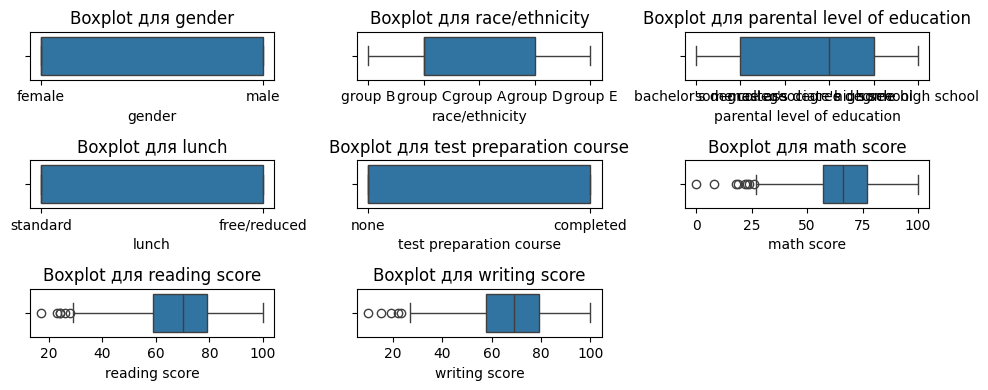

In [319]:
# Построим графики boxplot для обнаружения выбросов по каждой характеристике
plt.figure(figsize=(10, 10))

# Создание boxplot
for i, column in enumerate(['gender', 'race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score'], 1):
    plt.subplot(8, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot для {column}")
    
plt.tight_layout()
plt.show()

Для автоматического анализа выбросов мы можем использовать несколько методов, которые помогут оценить, являются ли данные выбросами и какие из них стоит оставить или удалить. Давайте используем следующие подходы:

Метод межквартильного размаха (IQR) — это один из самых популярных способов для обнаружения выбросов. Мы будем искать значения, которые выходят за пределы 
1.5×IQR, где IQR — это разница между 75-м и 25-м процентилем данных.

Z-оценка — этот метод позволяет определить, насколько отклоняется значение от среднего в терминах стандартного отклонения. Обычно выбросами считаются значения, для которых Z-оценка больше 3 или меньше -3.

In [320]:
import numpy as np

# Функция для поиска выбросов по методу IQR
def find_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Функция для поиска выбросов по методу Z-оценки
def find_outliers_z(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers[column] = df[np.abs(z_scores) > threshold]
    return outliers

# Вычисление выбросов для математических, чтения и письма
columns_to_check = ['math score', 'reading score', 'writing score']
outliers_iqr = find_outliers_iqr(df, columns_to_check)
outliers_z = find_outliers_z(df, columns_to_check)

# Выводим результаты
print("Выбросы по методу IQR:")
for col, data in outliers_iqr.items():
    print(f"{col}: {data.shape[0]} выбросов")

print("\nВыбросы по методу Z-оценки:")
for col, data in outliers_z.items():
    print(f"{col}: {data.shape[0]} выбросов")


Выбросы по методу IQR:
math score: 8 выбросов
reading score: 6 выбросов
writing score: 5 выбросов

Выбросы по методу Z-оценки:
math score: 4 выбросов
reading score: 4 выбросов
writing score: 4 выбросов


Так как выбросы по Z-оценке и IQR частично совпадают, это подтверждает их значимость в данных.

Попробуем решить устранить проблему выбросов для writing score и reading score и math score, заменив их на медиану. 

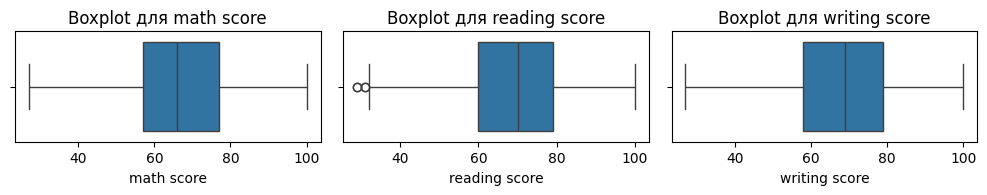

In [321]:
# Функция для замены выбросов на медиану
def replace_outliers_with_median(df, columns):
    for column in columns:
        # Находим границы по методу IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Заменяем выбросы на медиану
        median = df[column].median()
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df

# Заменим выбросы на медиану для баллов
df = replace_outliers_with_median(df.copy(), columns_to_check)


# Построим графики для проверки
plt.figure(figsize=(10, 5))

# Создание boxplot
for i, column in enumerate(['math score','reading score','writing score'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot для {column}")
    
plt.tight_layout()
plt.show()


### Связи между объектами:

 Анализ данных покажет, как каждый из атрибутов (пол, этническая принадлежность, уровень образования родителей, тип обеда, курс подготовки) влияет на оценки студентов, что поможет выявить ключевые факторы, способствующие или препятствующие успеваемости.

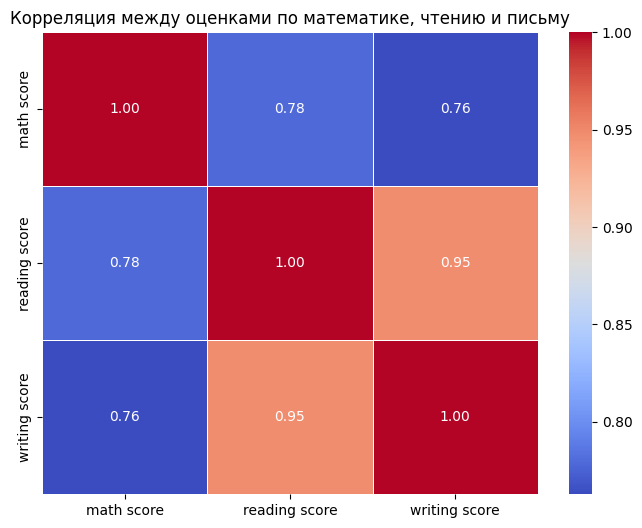

In [322]:
# Расчет корреляции между оценками по математике, чтению и письму
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()

# Визуализация матрицы корреляций
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция между оценками по математике, чтению и письму')
plt.show()


Корреляция между всеми тремя оценками высока, особенно между оценками по чтению и письму (0.95), а также между чтением и математикой (0.78). Это говорит о том, что студенты, которые показывают высокие результаты в одном из этих предметов, обычно показывают хорошие результаты и в других предметах.

Математика имеет наиболее слабую корреляцию с другими предметами (0.78 и 0.76), но все равно достаточно значимую. Это может означать, что успехи в математике несколько менее связаны с успехами в чтении и письме, чем между чтением и письмом, но все же есть определенная связь.

Чтение и письмо имеют почти идеальную корреляцию (0.95), что указывает на очень высокую взаимосвязь между этими двумя видами деятельности. Это может свидетельствовать о том, что навыки, необходимые для хорошего выполнения задания по чтению, схожи с теми, что необходимы для успешного написания текста.

Если целью является улучшение успеваемости студентов, стоит сосредоточиться на факторах, которые могут улучшить все три навыка одновременно. Например, можно обратить внимание на методы, развивающие как читаемость, так и письмо, так как они сильно взаимосвязаны.
Математика может потребовать отдельного внимания или подхода, так как ее корреляция с чтением и письмом ниже, чем между чтением и письмом.

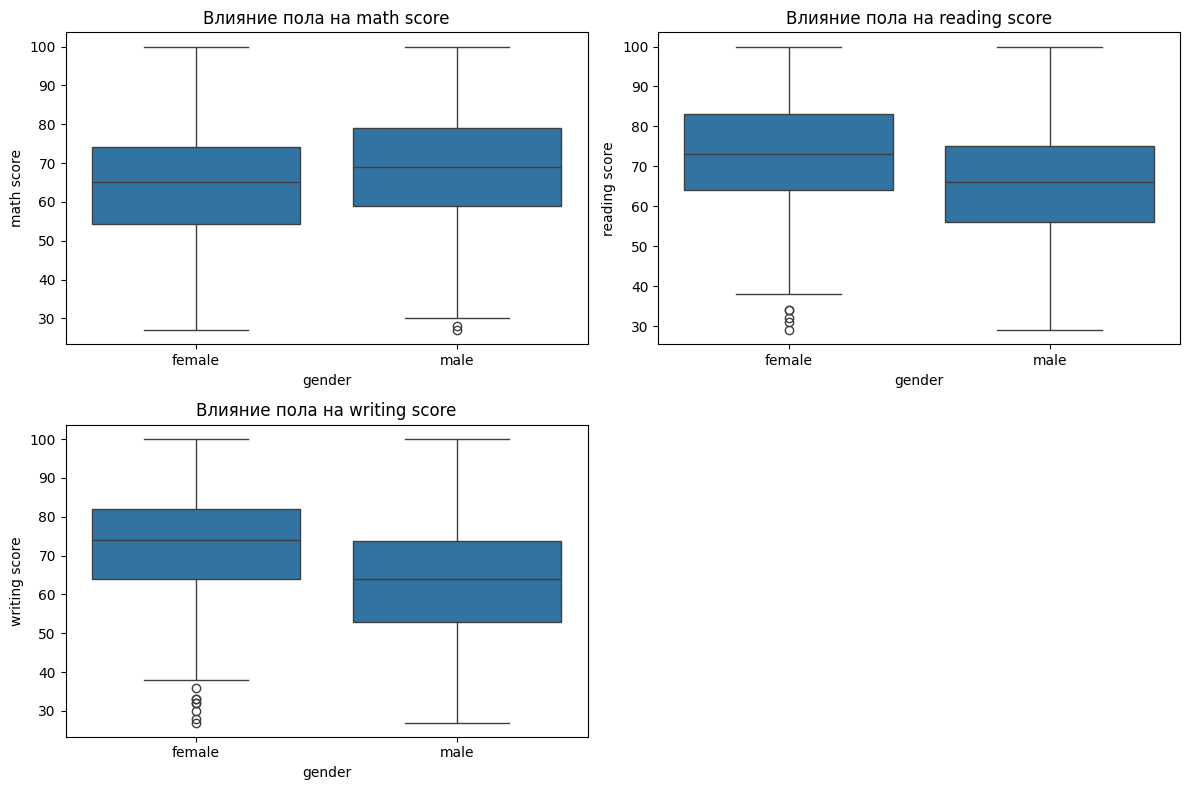

In [323]:
# Влияние пола на оценки
plt.figure(figsize=(12, 8))

# Boxplot для math score по полу
plt.subplot(2, 2, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Влияние пола на math score')

# Boxplot для reading score по полу
plt.subplot(2, 2, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Влияние пола на reading score')

# Boxplot для writing score по полу
plt.subplot(2, 2, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Влияние пола на writing score')

plt.tight_layout()
plt.show()


Женщины, как правило, демонстрируют лучшие результаты в чтении и письме, чем мужчины, в то время как в математике различие менее выражено.

Для мужчин характерны выбросы с низкими оценками в чтении и письме, что может свидетельствовать о необходимости дополнительной поддержки или изменений в методиках обучения.

Женщины могут иметь более высокие и стабильные результаты, что также заслуживает внимания для дальнейших исследований.

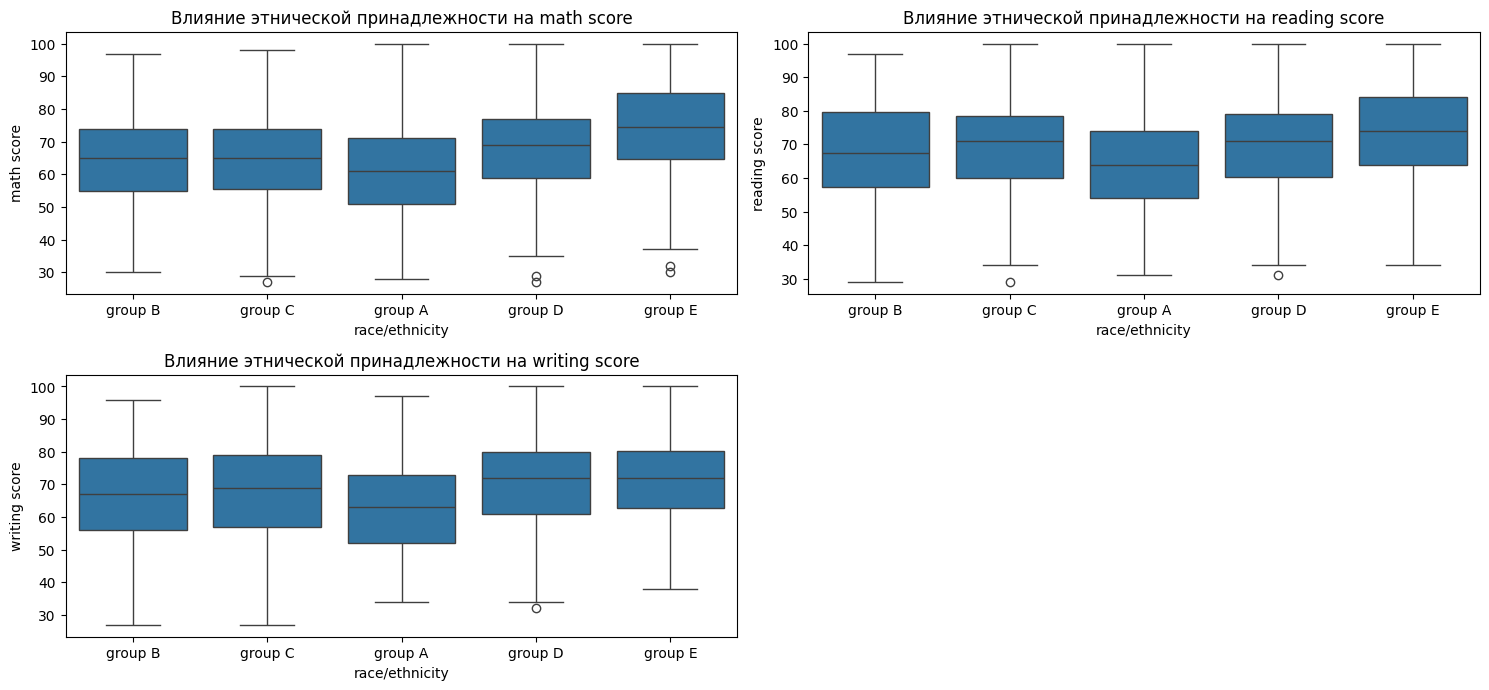

In [324]:
# Влияние этнической принадлежности на оценки
plt.figure(figsize=(15, 10))

# Boxplot для math score по этнической принадлежности
plt.subplot(3, 2, 1)
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.title('Влияние этнической принадлежности на math score')

# Boxplot для reading score по этнической принадлежности
plt.subplot(3, 2, 2)
sns.boxplot(x='race/ethnicity', y='reading score', data=df)
plt.title('Влияние этнической принадлежности на reading score')

# Boxplot для writing score по этнической принадлежности
plt.subplot(3, 2, 3)
sns.boxplot(x='race/ethnicity', y='writing score', data=df)
plt.title('Влияние этнической принадлежности на writing score')

plt.tight_layout()
plt.show()


Этническая принадлежность имеет значительное влияние на успеваемость студентов, особенно между группами с более высокими и более низкими результатами. Это подтверждается тем, что группы E и D стабильно показывают более высокие результаты, чем другие.

Этот фактор следует учитывать при разработке методов поддержания успеха студентов, особенно в группах с более низкими результатами.

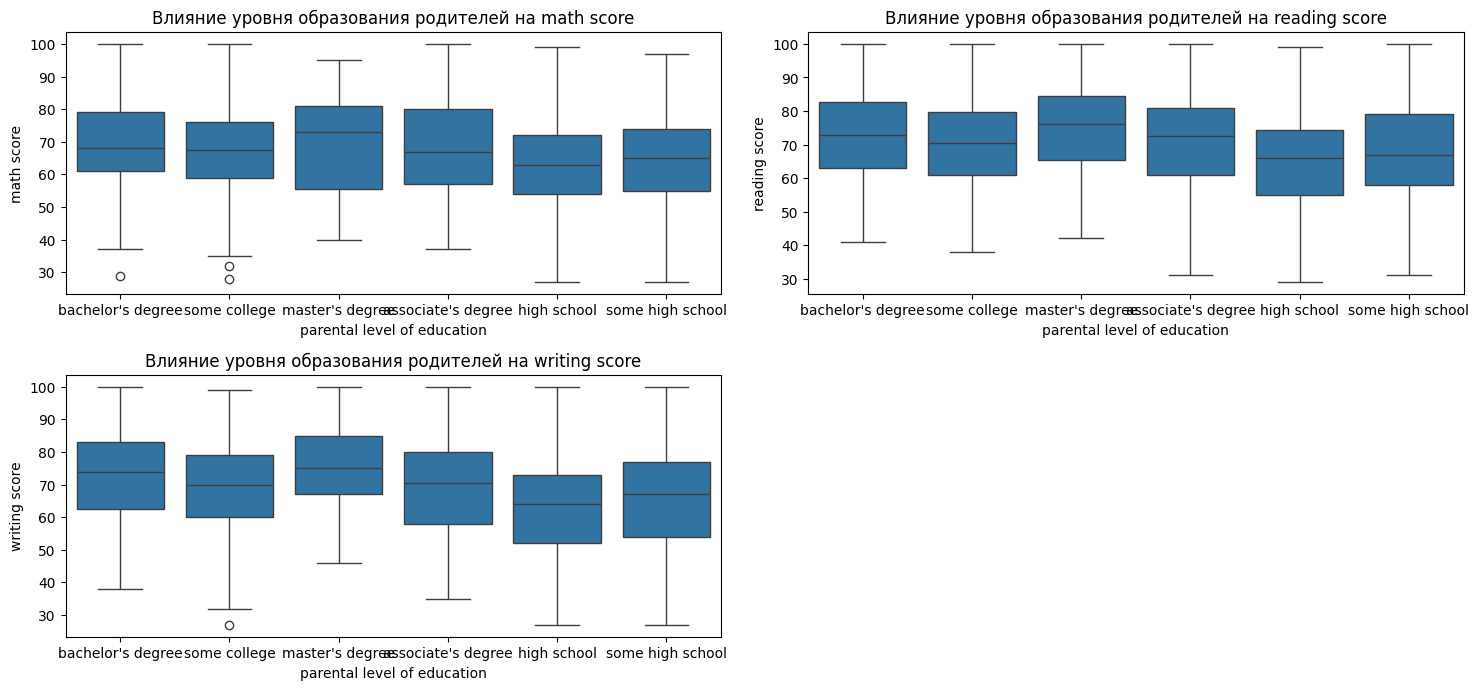

In [325]:
# Влияние уровня образования родителей на оценки
plt.figure(figsize=(15, 10))

# Boxplot для math score по уровню образования родителей
plt.subplot(3, 2, 1)
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Влияние уровня образования родителей на math score')

# Boxplot для reading score по уровню образования родителей
plt.subplot(3, 2, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.title('Влияние уровня образования родителей на reading score')

# Boxplot для writing score по уровню образования родителей
plt.subplot(3, 2, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.title('Влияние уровня образования родителей на writing score')

plt.tight_layout()
plt.show()


Уровень образования родителей оказывает значительное влияние на успеваемость студентов по всем предметам: математике, чтению и письму. Студенты с родителями, имеющими высшее образование (особенно степень бакалавра или выше), показывают наивысшие результаты, а также более стабильные оценки.  

Студенты с родителями, имеющими среднее образование или диплом старшей школы, имеют более низкие результаты и большую вариативность, что может свидетельствовать о разнице в образовательных возможностях, доступных этим студентам.  

Выбросы в некоторых группах (особенно у студентов с родителями с средним образованием и дипломом старшей школы) могут указывать на случаи, когда студенты из этих категорий столкнулись с дополнительными трудностями в учебе, возможно, из-за менее квалифицированных условий обучения или недостаточной поддержки.

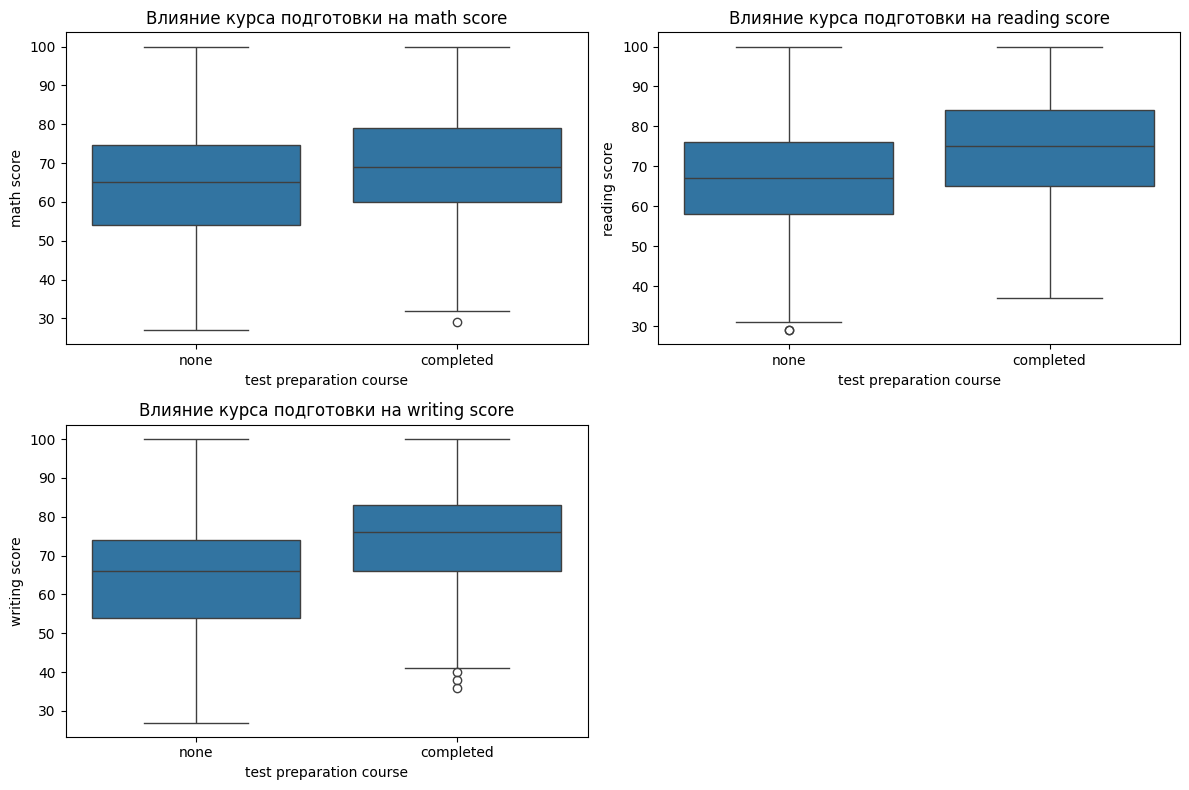

In [326]:
# Влияние курса подготовки на оценки
plt.figure(figsize=(12, 8))

# Boxplot для math score по курсу подготовки
plt.subplot(2, 2, 1)
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Влияние курса подготовки на math score')

# Boxplot для reading score по курсу подготовки
plt.subplot(2, 2, 2)
sns.boxplot(x='test preparation course', y='reading score', data=df)
plt.title('Влияние курса подготовки на reading score')

# Boxplot для writing score по курсу подготовки
plt.subplot(2, 2, 3)
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Влияние курса подготовки на writing score')

plt.tight_layout()
plt.show()


Курс подготовки оказывает положительное влияние на успеваемость студентов во всех трех предметах, особенно по математике и письму.  

Студенты, прошедшие курс подготовки, имеют значительно более высокие оценки и меньше выбросов с низкими баллами.

Это подтверждает важность подготовки студентов перед экзаменами, что помогает улучшить их успеваемость и снизить уровень неудач в учебе.

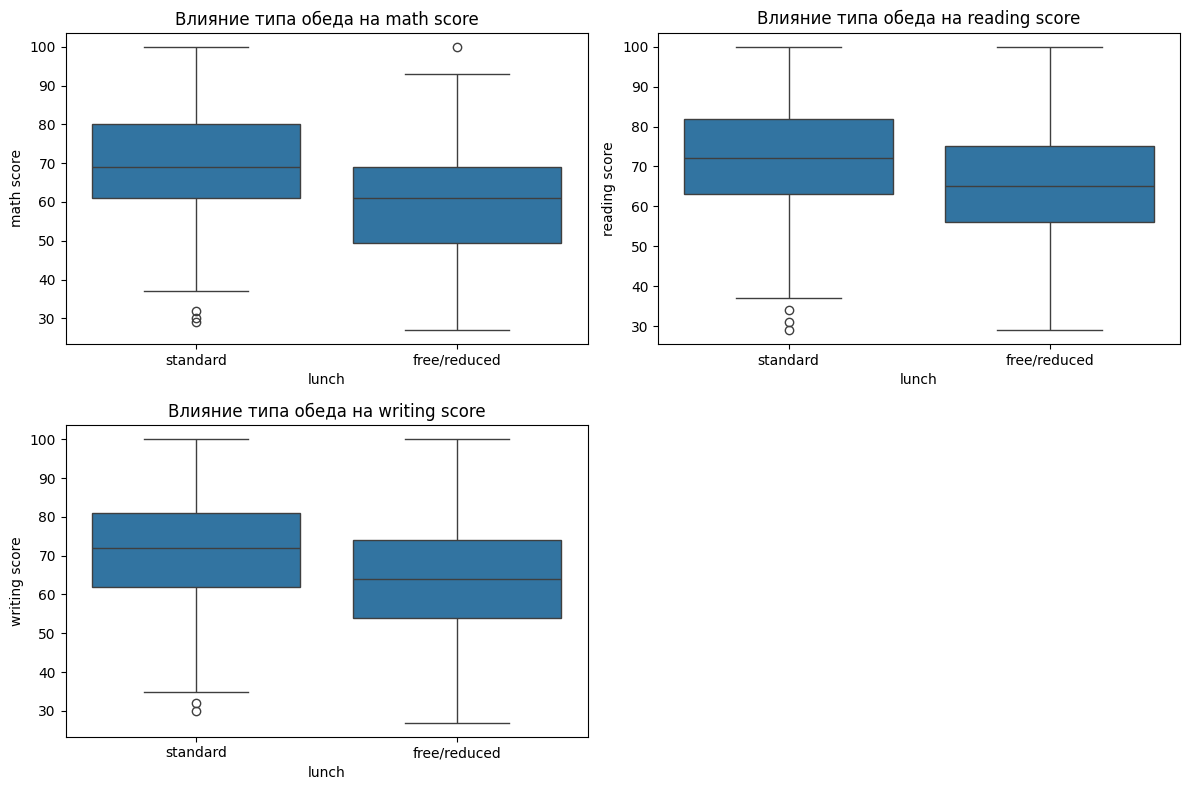

In [327]:
# Влияние курса подготовки на оценки
plt.figure(figsize=(12, 8))

# Boxplot для math score по курсу подготовки
plt.subplot(2, 2, 1)
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Влияние типа обеда на math score')

# Boxplot для reading score по курсу подготовки
plt.subplot(2, 2, 2)
sns.boxplot(x='lunch', y='reading score', data=df)
plt.title('Влияние типа обеда на reading score')

# Boxplot для writing score по курсу подготовки
plt.subplot(2, 2, 3)
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('Влияние типа обеда на writing score')

plt.tight_layout()
plt.show()

Тип обеда действительно может оказывать влияние на успеваемость студентов. Разница в оценках между группами standard и free/reduced указывает на то, что этот признак важен для анализа.

Студенты с бесплатными обедами в среднем показывают меньше стабильности в результатах, что можно связать с другими социальными и экономическими факторами, влияющими на их учебный процесс.

Исходя из анализа и результатов, мы можем выбрать только те признаки, которые действительно оказывают влияние на успеваемость студентов:

1. gender (пол) — оказывает влияние на успеваемость, особенно в письме и чтении.  
2. parental level of education (уровень образования родителей) — важный фактор, сильно влияющий на успеваемость.
3. test preparation course (курс подготовки к тесту) — влияет на результаты студентов, особенно по математике и письму.
4. lunch (тип обеда) — имеет влияние, хоть и менее выраженное, но все же важно для предсказания успеваемости.
5. race/ethnicity (этническая принадлежность) — оказывает влияние на успеваемость, особенно в различиях между группами с высокими и низкими результатами.

Эти признаки имеют заметное влияние на успеваемость студентов, и они будут полезны для построения более точной модели.

### Конструирование признаков для решения задач

1. Новый общий признак — Общий балл  

    Можно создать новый признак, который будет представлять общую успеваемость студента. Например, можно суммировать баллы по всем предметам и создать общий балл. Это поможет улучшить предсказание на основе общего уровня успеваемости студента.

    Пример: total_score = math_score + reading_score + writing_score


2. Категоризация баллов

    Использование дискретизации числовых признаков (например, преобразование баллов в категории) может быть полезным для обучения модели, которая будет работать с дискретными данными, а не с непрерывными.

    Примеры категорий:

    "Low", "Medium", "High" для баллов
    Классификация на основе квантилей или фиксированных пороговых значений.

3. Моделирование категориальных признаков

    Для категориальных признаков (таких как gender, race/ethnicity, parental level of education, lunch, test preparation course) необходимо выполнить one-hot encoding (унитарное кодирование), чтобы модель могла работать с ними.

4. Масштабирование числовых признаков:  

    Стандартизируем числовые признаки (например, total_score).

In [328]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. One-hot encoding для категориальных признаков
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)


# 2. Создание новых признаков
# - Общий балл
df_encoded['total_score'] = df['math score'] + df['reading score'] + df['writing score']
# - Категоризация баллов по математике, чтению и письму
def discretize_score(score):
     if score < 200:
         return 'Low'
     elif 250 <= score < 200:
         return 'Medium'
     else:
         return 'High'
df_encoded['total_score_discrete'] = df_encoded['total_score'].apply(lambda x: discretize_score(x))


# 3. Масштабирование числовых признаков (например, total_score и average_score)
scaler = StandardScaler()
df_encoded[['total_score']] = scaler.fit_transform(df_encoded[['total_score']])

# Заменяем значения в total_score_discrete
df_encoded['total_score_discrete'] = df_encoded['total_score_discrete'].replace({'High': 3, 'Medium': 2, 'Low': 1})

# Проверка получившихся данных
print(df_encoded.head())


   math score  reading score  writing score  gender_male  \
0        72.0           72.0           74.0        False   
1        69.0           90.0           88.0        False   
2        90.0           95.0           93.0        False   
3        47.0           57.0           44.0         True   
4        76.0           78.0           75.0         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1                   Fals

C:\Users\New\AppData\Local\Temp\ipykernel_7044\825875804.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['total_score_discrete'] = df_encoded['total_score_discrete'].replace({'High': 3, 'Medium': 2, 'Low': 1})


### Конструирование признаков с помощью Featuretools

In [329]:
import featuretools as ft
from woodwork.logical_types import Categorical, Integer

# Создаем EntitySet
es = ft.EntitySet(id="students_es")

# Добавляем таблицу данных в EntitySet (таблица "students")
es = es.add_dataframe(
    dataframe_name="students",
    dataframe=df,
    index="student_id",
    logical_types={
        'gender': Categorical,
        'race/ethnicity': Categorical,
        'parental level of education': Categorical,
        'lunch': Categorical,
        'test preparation course': Categorical,
        'math score': Integer,
        'reading score': Integer,
        'writing score': Integer,
    }
)


# Теперь с помощью Deep Feature Synthesis (DFS) создадим новые признаки
# Применяем агрегационные и трансформационные примитивы
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="students",
    agg_primitives=["mean", "sum", "count", "mode", "min", "max"],
    max_depth=1  # Уровень вложенности признаков
)

# Выводим несколько новых признаков
print(feature_matrix.head())


            gender race/ethnicity parental level of education         lunch  \
student_id                                                                    
0           female        group B           bachelor's degree      standard   
1           female        group C                some college      standard   
2           female        group B             master's degree      standard   
3             male        group A          associate's degree  free/reduced   
4             male        group C                some college      standard   

           test preparation course  math score  reading score  writing score  
student_id                                                                    
0                             none          72             72             74  
1                        completed          69             90             88  
2                             none          90             95             93  
3                             none          47     

d:\5semestr\AIM\aimvenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index student_id not found in dataframe, creating new integer column
  warnings.warn(
d:\5semestr\AIM\aimvenv\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['count', 'max', 'mean', 'min', 'mode', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


### Разбиение датасета на три части: обучающую, контрольную и тестовую выборки

Обучающая выборка (training set): используется для обучения модели. Это основная часть данных, на которой модель обучается находить зависимости.

Валидационная выборка (validation set): используется для настройки гиперпараметров модели. Во время обучения модель проверяется на этой выборке, чтобы выбрать оптимальные параметры и избежать переобучения.

Тестовая выборка (test set): используется для окончательной проверки модели после завершения процесса обучения. Тестовые данные не используются в процессе обучения и позволяют объективно оценить качество модели.

In [330]:
from sklearn.model_selection import train_test_split

# Предполагаем, что df — это DataFrame, содержащий все ваши данные
X = df_encoded.drop(columns=["total_score"])  # Признаки
y = df_encoded["total_score"]  # Несколько целевых признаков

# Разбиение на обучающую и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Разбиение временной выборки на контрольную и тестовую
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Печатаем размеры выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер контрольной выборки: {X_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (700, 16)
Размер контрольной выборки: (150, 16)
Размер тестовой выборки: (150, 16)



### Оценка сбалансированности выборок


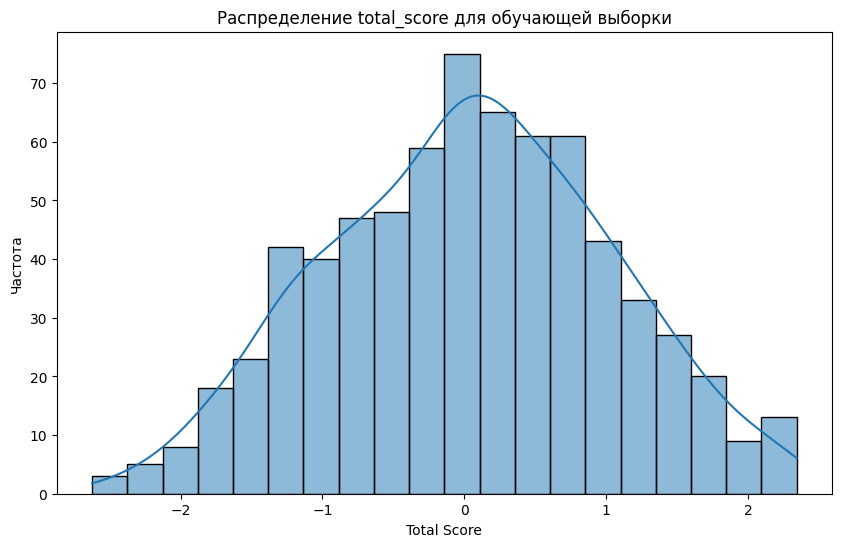

Статистики для обучающей выборки:
count    700.000000
mean       0.034540
std        0.991849
min       -2.623699
25%       -0.690803
50%        0.043209
75%        0.734403
max        2.343111
Name: total_score, dtype: float64


In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

# Оценим распределение целевого признака (total_score) для обучающей выборки

# Создаем график для обучающей выборки
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, bins=20)
plt.title("Распределение total_score для обучающей выборки")
plt.xlabel("Total Score")
plt.ylabel("Частота")
plt.show()

# Статистики распределения для обучающей выборки
print("Статистики для обучающей выборки:")
print(y_train.describe())


Все целевая переменная (общий балл) имеет незначительное смещение влево, что говорит о том, что большинство студентов набирают средние и ниже средние баллы. Эти данные не требуют аугментации с точки зрения смещения.

### Оценка качества признаков

Для того чтобы оценить качество каждого набора признаков по таким критериям, как предсказательная способность, скорость вычисления, надежность, корреляция и цельность, нам нужно:

1. **Предсказательная способность**: Оценить, насколько хорошо признаки предсказывают целевые переменные, используя модель машинного обучения.
2. **Скорость вычисления**: Измерить время, необходимое для вычислений.
3. **Надежность**: Оценить устойчивость модели и признаков на кросс-валидации.
4. **Корреляция**: Измерить корреляцию между признаками и целевыми переменными.
5. **Цельность**: Проверить, насколько хорошо признаки отражают ключевые аспекты целевой переменной.

MAE: 6.732808754961184e-16
R2: 1.0
Время обучения модели: 0.0310 секунд
Кросс-валидация (R2): 1.0 ± 0.0


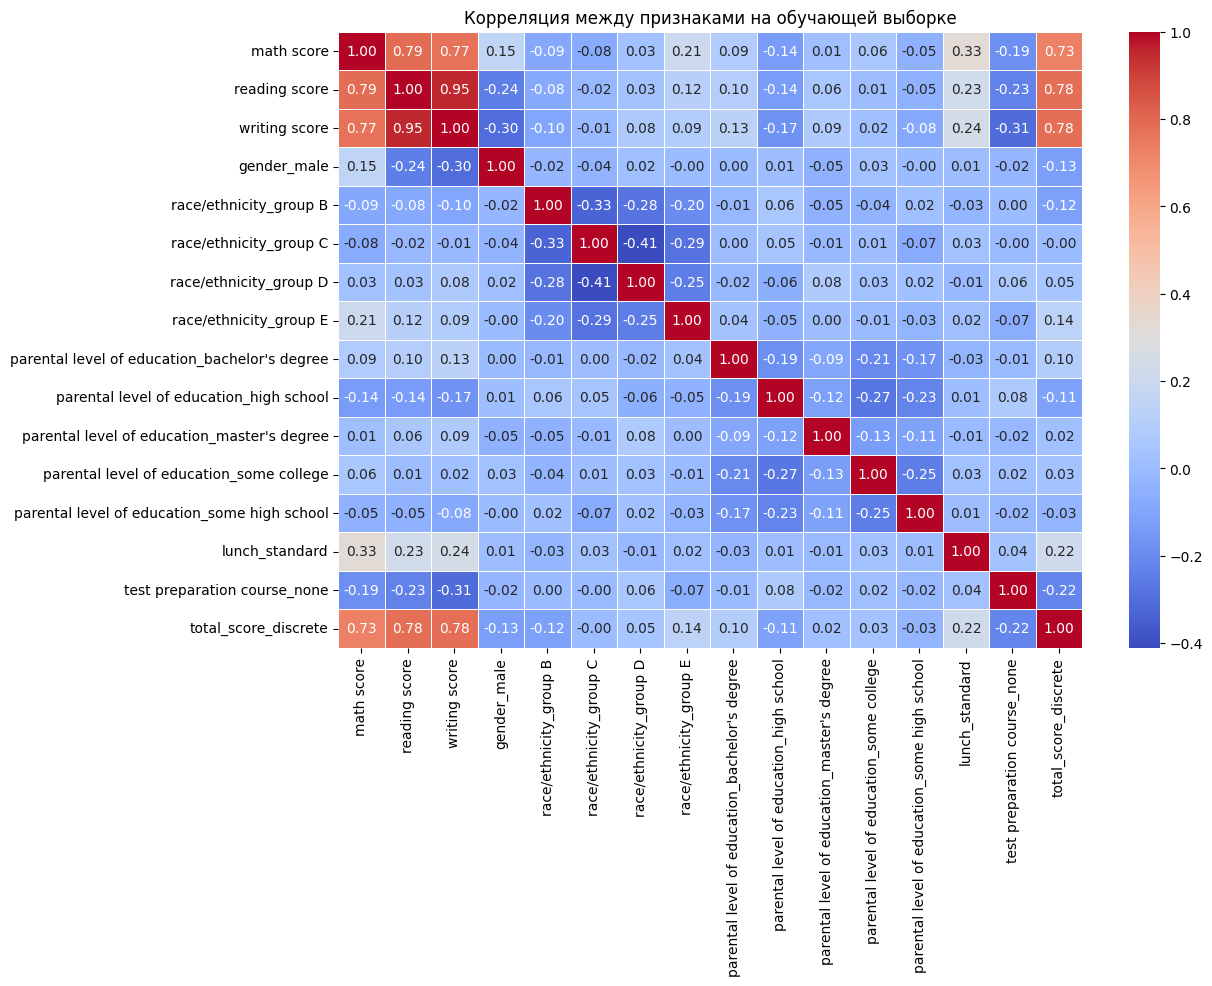

                                          Feature    Importance
2                                   writing score  2.446705e-02
1                                   reading score  2.446705e-02
0                                      math score  2.446705e-02
15                           total_score_discrete  1.235990e-17
8   parental level of education_bachelor's degree  1.146544e-17
7                          race/ethnicity_group E  9.595189e-18
6                          race/ethnicity_group D  9.002266e-18
4                          race/ethnicity_group B  3.794708e-18
14                   test preparation course_none  7.589415e-19
12   parental level of education_some high school -1.036768e-18
11       parental level of education_some college -1.544988e-18
5                          race/ethnicity_group C -4.377466e-18
9         parental level of education_high school -6.586528e-18
13                                 lunch_standard -1.225148e-17
3                                     ge

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import time
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Оценка предсказательной способности
def evaluate_predictive_power(X_train, y_train, X_test, y_test):
    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Сделаем предсказания
    y_pred = model.predict(X_test)
    
    # Оценим метрики
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, r2

# Оценка предсказательной способности на обучающей и тестовой выборках
mae, r2 = evaluate_predictive_power(X_train, y_train, X_test, y_test)
print(f"MAE: {mae}")
print(f"R2: {r2}")

# 2. Оценка скорости вычисления
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
end_time = time.time()
print(f"Время обучения модели: {end_time - start_time:.4f} секунд")

# 3. Оценка надежности (кросс-валидация на обучающей выборке)
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(f"Кросс-валидация (R2): {cv_scores.mean()} ± {cv_scores.std()}")

# 4. Оценка корреляции
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 8))  # Размер фигуры: 12 дюймов по ширине и 8 дюймов по высоте
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляция между признаками на обучающей выборке")
plt.show()



# 5. Оценка цельности (важность признаков)
model = LinearRegression()
model.fit(X_train, y_train)

feature_importance = model.coef_
feature_names = X_train.columns

# Создаем DataFrame для отображения важности
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Сортируем по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


1. Предсказательная способность
R2: Результат R² равен 1.0, что означает, что модель идеально объясняет дисперсию целевой переменной в тестовой выборке. Это идеальный результат для регрессионной модели. Однако, такая высокая точность может быть признаком переобучения, особенно если модель слишком точно подгоняет данные без должной обобщающей способности.
MAE (Mean Absolute Error): Значение MAE близко к нулю (практически 0), что означает, что ошибка предсказания очень мала. Однако это может быть связано с идеальным R², что указывает на возможное переобучение.
2. Скорость вычисления
Время обучения: Модель обучается очень быстро (0.0310 секунд), что является хорошим признаком, особенно при использовании линейной регрессии, которая не требует больших вычислительных ресурсов.
3. Надежность (Кросс-валидация)
Кросс-валидация (R²): Значение R² также равняется 1.0 при кросс-валидации, что подтверждает, что модель показывает отличные результаты на разных подвыборках обучающих данных. Однако, как и в случае с R², это может быть показателем переобучения, так как модель стабильно дает идеальные результаты при кросс-валидации.
Стандартное отклонение (cv_scores.std()): Поскольку стандартное отклонение равно 0, это подтверждает, что модель стабильна на всех подвыборках и не зависит от случайности.
4. Корреляция
Корреляция между признаками: Тепловая карта показывает корреляцию между признаками, которая выглядит ожидаемо. В частности, баллы по математике, чтению и письму имеют высокую корреляцию друг с другом, что может быть полезно для предсказания общей успеваемости студентов.
Корреляция с целевыми переменными: Особое внимание стоит уделить корреляции между целевыми переменными и прочими признаками. Например, признаки, такие как пол и этническая принадлежность, имеют низкую корреляцию с баллами, что указывает на слабую связь этих категориальных признаков с результатами. В то же время, признак "total_score_discrete" сильно коррелирует с оценками (что логично, так как это синтез баллов), и это также подтверждается высокой важностью в модели.
5. Цельность (Важность признаков)
Важность признаков: Признаки "math score", "reading score" и "writing score" имеют самую высокую важность в модели, что логично, так как они непосредственно представляют успеваемость студента и их высокий коэффициент важности ожидаем.
Низкая важность для других признаков: Признаки, такие как "gender_male", "lunch_standard", и "parental level of education_some high school", имеют низкую важность для модели, что указывает на их слабую связь с общей успеваемостью студентов.
"total_score_discrete" имеет достаточно низкую важность по сравнению с другими признаками, что говорит о том, что этот признак, возможно, имеет зависимость с другими баллами, но его важность меньше, чем непосредственно баллы по предметам.

### Выводы:

**Предсказательная способность:**  

Модель демонстрирует отличную предсказательную способность, с идеальными результатами по меткам R² и MAE. Однако это может свидетельствовать о переобучении, особенно при высоких значениях R².

**Скорость вычисления:**  

Модель обучается очень быстро, что является хорошим результатом и подходит для быстрой обработки данных.

**Надежность:**

Модель стабильна на разных подвыборках, что подтверждается результатами кросс-валидации с нулевым стандартным отклонением.

**Корреляция:**

Модель обнаруживает высокую корреляцию между оценками по математике, чтению и письму, но небольшую корреляцию между признаками, такими как этническая принадлежность и пол, с оценками.

**Цельность:**

Признаки, связанные с баллами, обладают высокой важностью для модели. В то же время, некоторые категориальные признаки, такие как "gender" и "lunch", имеют низкую важность для предсказания успеваемости.